In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [55]:
df=pd.read_csv(r"C:\Users\Shosse28\Desktop\ROC Curve\diabetes.csv")  

In [56]:
df.head(5) 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [57]:
array=df.values

In [58]:
X=array[:,0:8]
y=array[:,8]                # alternative          X=df.iloc[:,0:8].values  or 
                            #                      X=df.drop('Outcome', axis=1)   y=df['class'].values 

In [59]:
model=LogisticRegression(solver='newton-cg')

In [60]:
Xtrain, Xtest, ytrain, ytest = train_test_split (X, y, test_size=0.25, random_state=0)

In [61]:
model.fit(Xtrain, ytrain)

LogisticRegression(solver='newton-cg')

In [62]:
model.intercept_

array([-8.37849503])

In [63]:
model.coef_

array([[ 0.08614957,  0.03312645, -0.01118074,  0.00604396, -0.00100745,
         0.08799524,  0.80048928,  0.02222434]])

In [64]:
# predict the class for Xtest

In [65]:
ypred=model.predict(Xtest)

In [66]:
ypred;         

In [67]:
t=  model.intercept_ + (model.coef_ * Xtest)   # y-hat = B0 + B1*X1 + B2*X2 + B3*X3 + B4*X4 + B5*X5 + B6*X6 + B7*X7 + B8*X8  

In [68]:
 model.score(Xtest,ytest)  # accuracy of testing data 

0.796875

In [69]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       130
         1.0       0.73      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



In [70]:
cm=confusion_matrix(ytest, ypred)

In [71]:
cm

array([[117,  13],
       [ 26,  36]], dtype=int64)

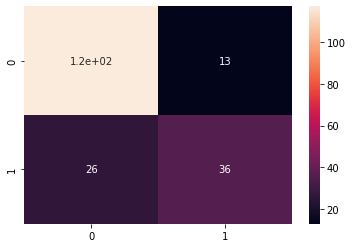

In [72]:
sns.heatmap(cm, annot=True);

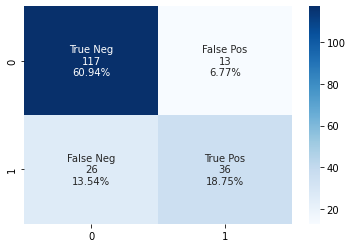

In [73]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues');  

In [74]:
# example 2 

In [75]:
df2= pd.read_csv(r"C:\Users\Shosse28\Desktop\ROC Curve\iris2.csv")

In [76]:
df2.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.10,3.50,1.40,0.20,0
1,4.90,3.00,1.40,0.20,0
2,4.70,3.20,1.30,0.20,0


In [77]:
X=df2.drop('Label', axis=1)

In [78]:
y=df2['Label']

In [79]:
model=LogisticRegression(multi_class='multinomial') # multi_class='multinomial' is used for multi-classification problem

In [80]:
Xtrain, Xtest, ytrain, ytest = train_test_split (X, y, test_size=0.25, random_state=0)

In [81]:
model.fit(Xtrain,ytrain)

LogisticRegression(multi_class='multinomial')

In [82]:
model.predict(Xtest)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2], dtype=int64)

In [83]:
model.score(Xtest, ytest)

0.9736842105263158

In [84]:
model.score(Xtrain, ytrain)

0.9821428571428571

In [85]:
### plot decision boundry for the first two features

In [86]:
XX=df2.iloc[:,[0,2]].values
yy=df2['Label'].values

In [87]:
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split (XX, yy, test_size=0.25, random_state=0)

In [88]:
model2=LogisticRegression(multi_class='multinomial', random_state=0)

In [89]:
model2.fit(Xtrain1, ytrain1)

LogisticRegression(multi_class='multinomial', random_state=0)

In [90]:
from mlxtend.plotting import plot_decision_regions

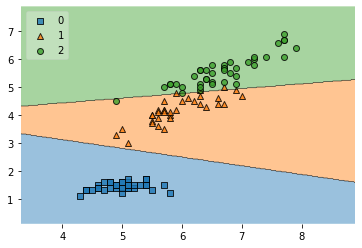

In [91]:
plot_decision_regions(Xtrain1, ytrain1, clf=model2, legend=2);

In [92]:
# How to apply multiple Learning algorithms???

In [93]:
# !pip install lazypredict        pip install lazypredict --user     OR    sudo pip install lazypredict

In [94]:
import lazypredict      # import lazypredict library 

In [95]:
# import Regression models from lazypredict

from lazypredict.Supervised import LazyRegressor

In [96]:
# import Classification models form lazypredict 

from lazypredict.Supervised import LazyClassifier 

In [97]:
# define our model using LazyClassifier 

multiple_ML_model = LazyClassifier (verbose=0, ignore_warnings=True, predictions=True)
      # predictions =-True  means we want to get the accuracy of each model 

In [98]:
# fitting the model

model, predictions = multiple_ML_model.fit(Xtrain1, Xtest1, ytrain1, ytest1)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.80it/s]


In [99]:
model

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.95,0.96,None,0.95,0.02
LGBMClassifier,0.95,0.94,None,0.95,0.10
NuSVC,0.95,0.94,None,0.95,0.02
XGBClassifier,0.95,0.94,None,0.95,0.08
SVC,0.95,0.94,None,0.95,0.01
SGDClassifier,0.95,0.94,None,0.95,0.01
ExtraTreesClassifier,0.95,0.94,None,0.95,0.19
KNeighborsClassifier,0.95,0.94,None,0.95,0.02
LabelPropagation,0.95,0.94,None,0.95,0.01


In [100]:
predictions

,AdaBoostClassifier,BaggingClassifier,BernoulliNB,CalibratedClassifierCV,DecisionTreeClassifier,DummyClassifier,ExtraTreeClassifier,ExtraTreesClassifier,GaussianNB,KNeighborsClassifier,...,PassiveAggressiveClassifier,Perceptron,QuadraticDiscriminantAnalysis,RandomForestClassifier,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SVC,XGBClassifier,LGBMClassifier
0,1,2,1,2,2,1,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,1,1,2,1,1,0,1,1,1,1,...,1,0,1,1,2,2,1,1,1,1
2,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,2,2,2,2,1,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,2,2,1,0,1,1,2,1,...,2,2,1,1,2,2,1,1,1,1
8,1,1,2,2,1,2,1,1,2,1,...,2,2,1,1,2,2,1,1,1,1
9,1,1,2,1,1,2,1,1,1,1,...,1,0,1,1,2,2,1,1,1,1


In [101]:
np.shape(Xtest)

(38, 4)

In [102]:
# plot sigmoid function for logistic regression

In [103]:
z=np.arange(-7,7,0.1)  # step size=0.1 

In [104]:
phiz=1 / (1+np.exp(-z))   # ecp belongs to numpy lib

In [105]:
# plot sigmoid function

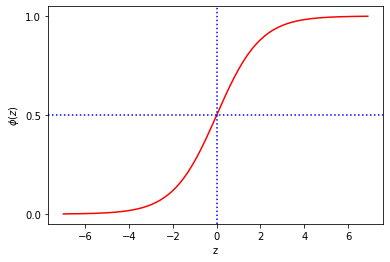

In [106]:
plt.plot(z, phiz, color='r')

plt.axvline(0, ls='dotted', color='b')    # ls means linestyle 
plt.axhline(y=0.5, ls='dotted', color='b')
plt.yticks([0, 0.5, 1])
plt.xlabel('z')
plt.ylabel('$\phi(z)$');